In [61]:
#importing libraries 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score  
from mpl_toolkits import mplot3d

In [53]:
# Reading data as dataframe
data = pd.read_csv('../data/featsel/data_scaled_minmax.csv')
data

,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,num_complete_weekend_days,num_complete_weekdays,made_trips,age,...,work_cms_zone_Northern Bronx,work_cms_zone_Outer Brooklyn,work_cms_zone_Outer Queens,work_cms_zone_Southern Bronx,work_cms_zone_Staten Island,work_cms_zone_Upper Manhattan,first_travel_date_day,first_travel_date_month,last_travel_date_day,last_travel_date_month
0,0.129213,0.010753,0.052632,0.305556,0.0,0.000000,1.0,1.0,1.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.766667,1.0,0.966667,1.0
1,0.084270,0.021505,0.017544,0.000000,0.0,0.000000,1.0,1.0,1.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.933333,0.0,0.100000,1.0
2,0.168539,0.236559,0.157895,0.000000,0.0,0.000000,1.0,1.0,1.0,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,1.0,0.366667,1.0
3,0.269663,0.247312,0.228070,0.000000,0.0,0.000000,1.0,0.4,1.0,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,1.0,0.700000,1.0
4,0.252809,0.139785,0.105263,0.333333,0.0,0.111111,1.0,1.0,1.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.233333,1.0,0.433333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,0.011236,0.000000,0.035088,0.000000,0.0,0.000000,0.0,0.2,1.0,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.400000,1.0,0.400000,1.0
3342,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.2,0.0,0.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.966667,0.0,0.966667,0.0
3343,0.016854,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.2,1.0,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.766667,0.0,0.766667,0.0
3344,0.022472,0.000000,0.035088,0.000000,0.0,0.055556,0.5,0.0,1.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.466667,1.0,0.466667,1.0


In [11]:
# #Drop "date" columns we wont include during the analysis 
# dete_columns = ['last_travel_date_month', 
#                 'last_travel_date_day', 
#                 'first_travel_date_month', 
#                 'first_travel_date_day']  
# data.drop(columns = dete_columns, inplace = True)

## Dimentioality Reduction
- Using PCA to reduce the original number of feature to 2, generates only 2 components, So we can plot the data.
- Keep features with at least 0.75 variance

In [54]:
#Initiate a pca model to reduce the dimentions of the data
#so we can plot it in the 2d space (as a post-processing step)
pca_model = PCA(n_components=2, random_state=0) 
#reduce the dimentions of the data used in the training process 
pca_data = pca_model.fit_transform(data)
#reduce the dimentions of the centroids 
pca_data.shape
# define "components_df" that include the valuse for the components after reducing the dimentions 
two_components_df = pd.DataFrame(
    pca_data,
    columns=["component_1", "component_2"],
    )

In [55]:
# Keep 75% of the variance in the original data after applying Pca
data_75_var = PCA(n_components=0.90)
data_75_var.fit(data)
print(f"Number of components that has 75% variance in the original data after applying PCA is\n {data_75_var.n_components_}")
data_75_var = data_75_var.fit_transform(data)

Number of components that has 75% variance in the original data after applying PCA is
 82


##### Using the elbow method to find the best value for K, trying K-means++ using the original dataset

c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

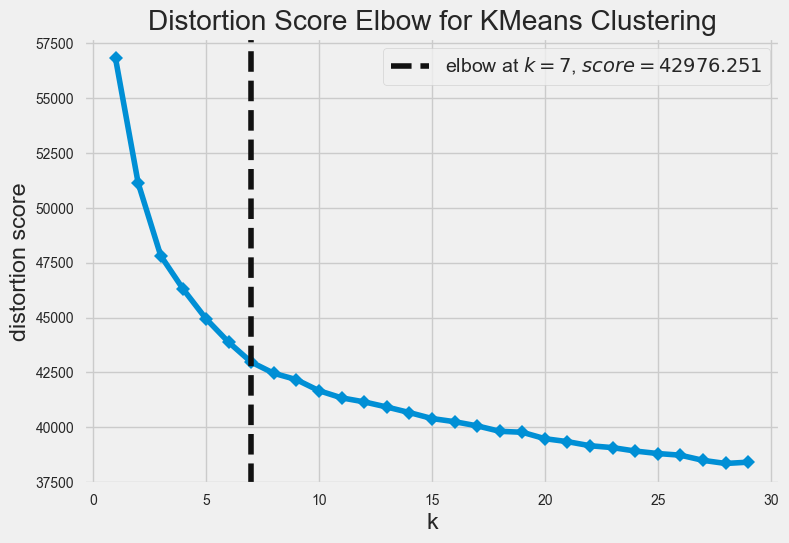

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
# Instantiate the clustering model and visualizer
K_means_model_ = KMeans()
K_means_visualizer_original_data = KElbowVisualizer(K_means_model_, k=(1,30), timings=False)
K_means_visualizer_original_data.fit(data)# Fit the data to the visualizer
K_means_visualizer_original_data.show()# Finalize and render the figure

### `From the plot above, a value between around 4 - 7 could be a good value for k`

### Using the elbow method to find the best value for K, trying K-means++ using data after the dimensioality reduction

c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

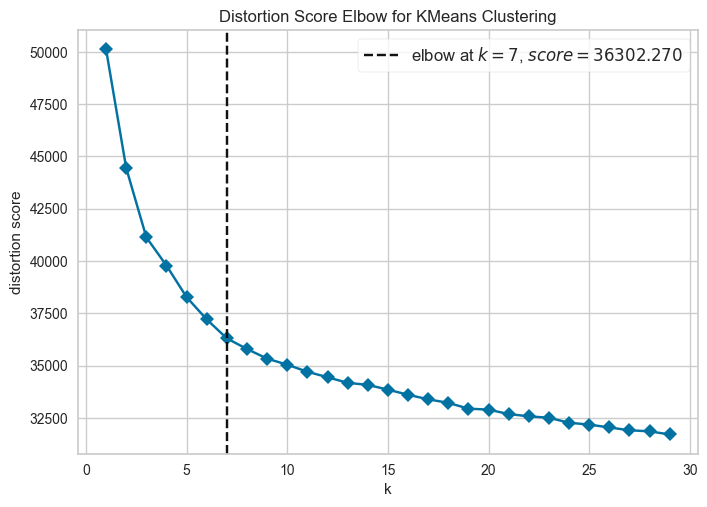

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# Instantiate the clustering model and visualizer
K_means_model = KMeans()
K_means_visualizer_reduced_data = KElbowVisualizer(K_means_model, k=(1,30), timings=False)
K_means_visualizer_reduced_data.fit(data_75_var)# Fit the data to the visualizer
K_means_visualizer_reduced_data.show()# Finalize and render the figure

In [57]:
#Initinate a KMeans model with 4 as a number of clusters
k_means_model_4_centroids = KMeans(n_clusters = 4, random_state = 42) 
#fit the model, store the label of each sample and the centroids 
#of each cluster
predicted_labels = k_means_model_4_centroids.fit_predict(data)
predicted_centers = k_means_model_4_centroids.cluster_centers_

c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


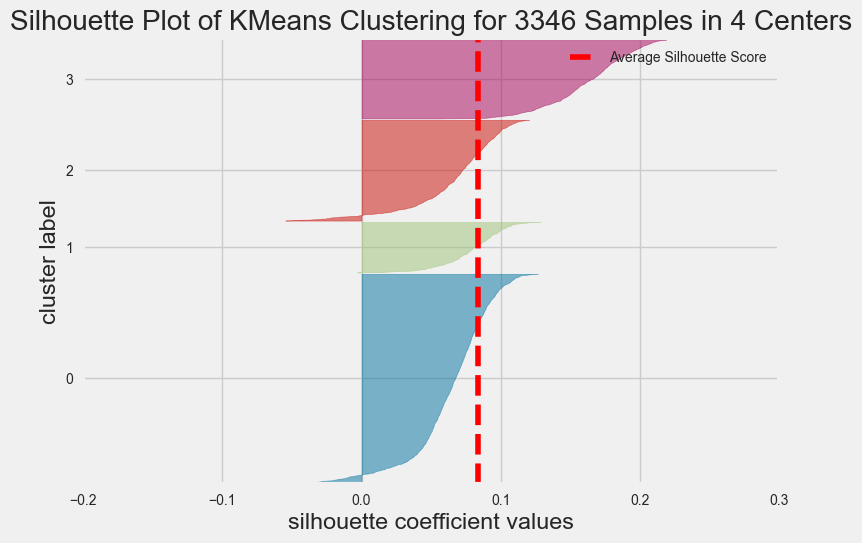

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 3346 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [58]:
visualizer = SilhouetteVisualizer(k_means_model_4_centroids, colors='yellowbrick')
# visualizer.
visualizer.fit(data)# Fit the data to the visualizer
visualizer.show()# Finalize and render the figure 

c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


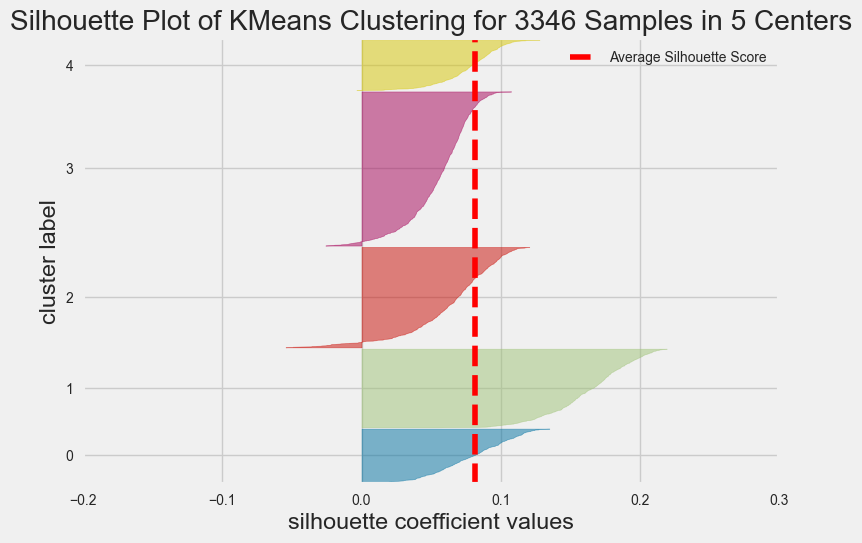

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 3346 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [59]:
#Initinate a KMeans model with 4 as a number of clusters
k_means_model_5_centroids = KMeans(n_clusters = 5, random_state = 42) 
visualizer = SilhouetteVisualizer(k_means_model_5_centroids, colors='yellowbrick')
# visualizer.
visualizer.fit(data) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure 

c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


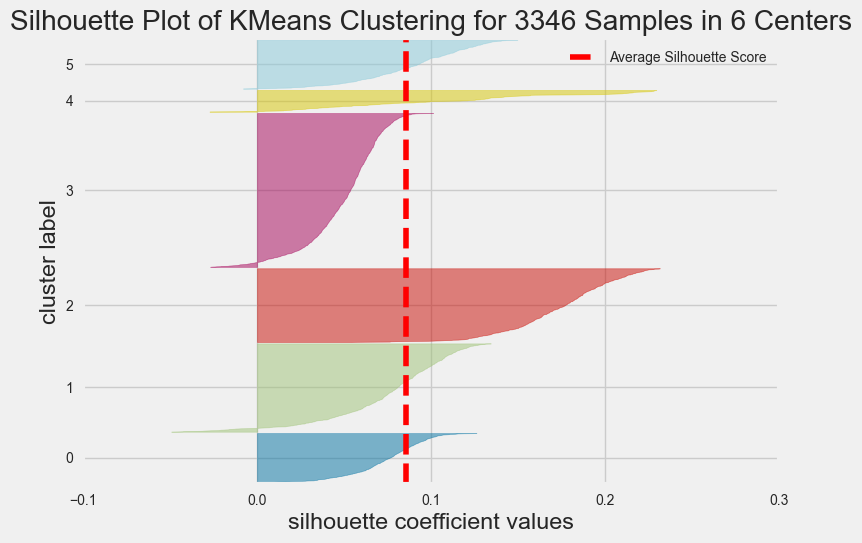

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 3346 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [60]:
#Initinate a KMeans model with 4 as a number of clusters
k_means_model_6_centroids = KMeans(n_clusters = 6, random_state = 42) 
visualizer = SilhouetteVisualizer(k_means_model_6_centroids, colors='yellowbrick')
# visualizer.
visualizer.fit(data) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

##### Using the elbow method to find the best value for K, trying K-medoids using the original dataset

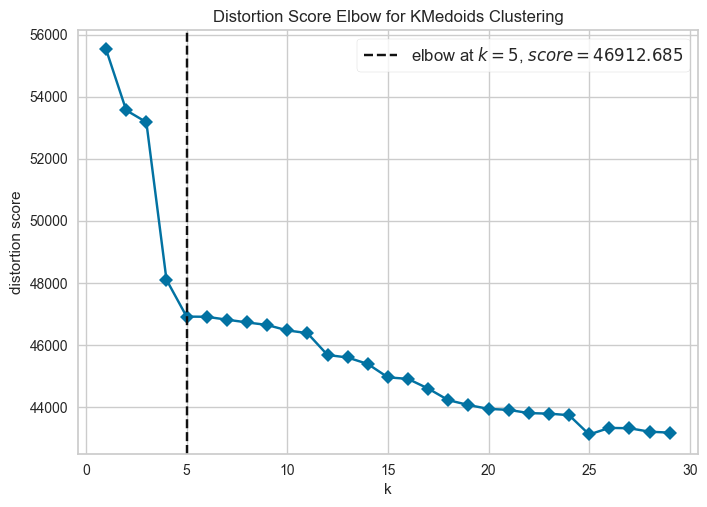

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# Instantiate the clustering model and visualizer
K_medoids_model_ = KMedoids()
K_medoids_visualizer_original_data = KElbowVisualizer(K_medoids_model_, k=(1,30), timings=False)
K_medoids_visualizer_original_data.fit(data)# Fit the data to the visualizer
K_medoids_visualizer_original_data.show()# Finalize and render the figure

#### Using the elbow method to find the best value for K, trying K-medoids using data after the dimensioality reduction

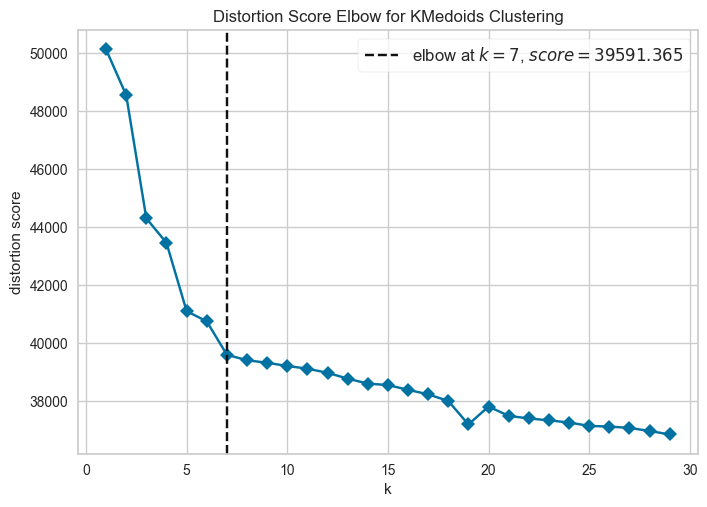

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# Instantiate the clustering model and visualizer
K_medoids_model = KMedoids()
K_medoids_visualizer_reduced_data = KElbowVisualizer(K_medoids_model, k=(1,30), timings=False)
K_medoids_visualizer_reduced_data.fit(data_75_var)# Fit the data to the visualizer
K_medoids_visualizer_reduced_data.show()# Finalize and render the figure

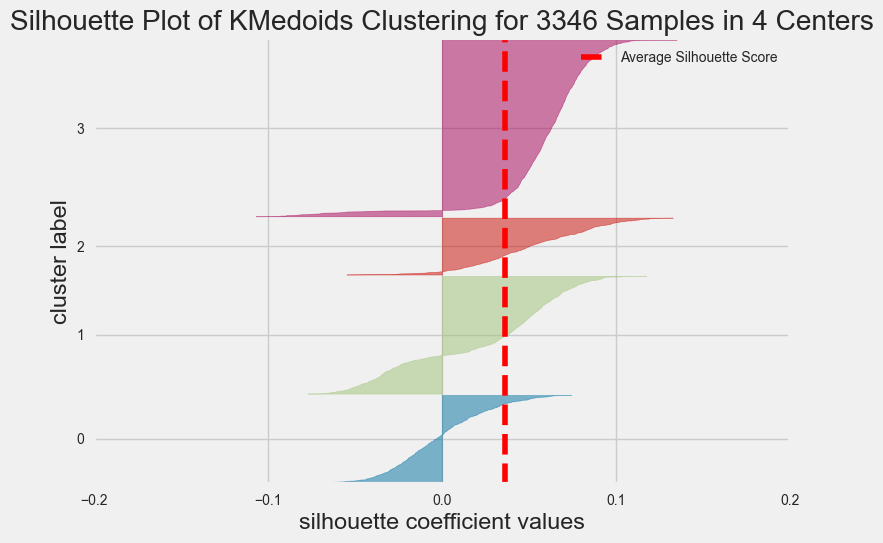

<AxesSubplot: title={'center': 'Silhouette Plot of KMedoids Clustering for 3346 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [48]:
k_medoids_model_4_centroids = KMedoids(n_clusters = 4)
visualizer = SilhouetteVisualizer(k_medoids_model_4_centroids, colors='yellowbrick')
# visualizer.
visualizer.fit(data)# Fit the data to the visualizer
visualizer.show()# Finalize and render the figure 

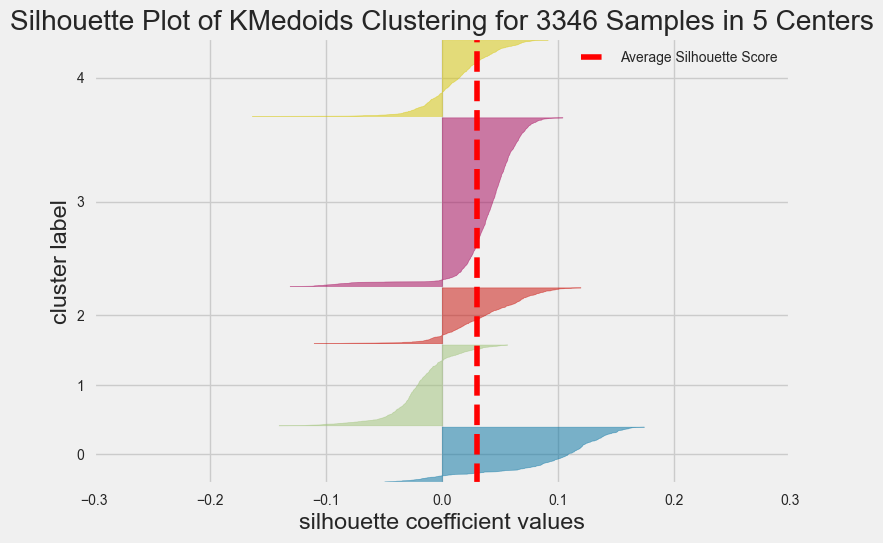

<AxesSubplot: title={'center': 'Silhouette Plot of KMedoids Clustering for 3346 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [49]:
k_medoids_model_5_centroids = KMedoids(n_clusters = 5)
visualizer = SilhouetteVisualizer(k_medoids_model_5_centroids, colors='yellowbrick')
# visualizer.
visualizer.fit(data)# Fit the data to the visualizer
visualizer.show()# Finalize and render the figure 

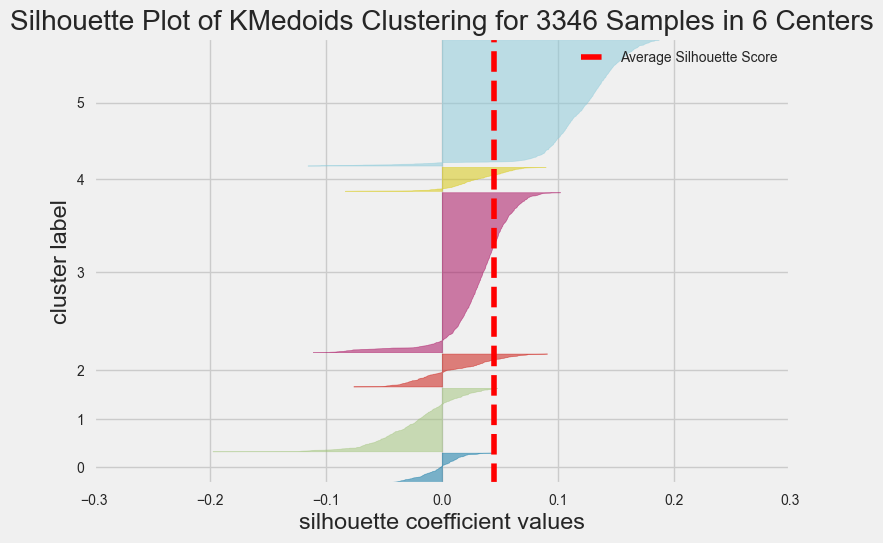

<AxesSubplot: title={'center': 'Silhouette Plot of KMedoids Clustering for 3346 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [50]:
k_medoids_model_6_centroids = KMedoids(n_clusters = 6)
visualizer = SilhouetteVisualizer(k_medoids_model_6_centroids, colors='yellowbrick')
# visualizer.
visualizer.fit(data)# Fit the data to the visualizer
visualizer.show()# Finalize and render the figure 

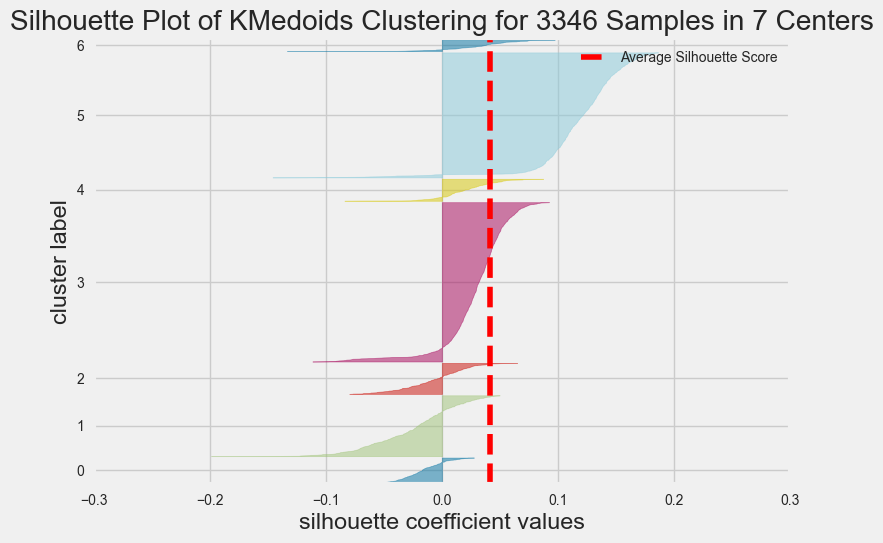

<AxesSubplot: title={'center': 'Silhouette Plot of KMedoids Clustering for 3346 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [51]:
k_medoids_model_7_centroids = KMedoids(n_clusters = 7)
visualizer = SilhouetteVisualizer(k_medoids_model_7_centroids, colors='yellowbrick')
# visualizer.
visualizer.fit(data)# Fit the data to the visualizer
visualizer.show()# Finalize and render the figure 

In [64]:
visualizer.silhouette_score_

0.08563980276115307

In [107]:
def calculate_silhouette_score(model_instance, potential_k, data):
    silhouette_score_result = []
    # potential_k = list(range(min(potential_k_range), max(potential_k_range)))
    for k in potential_k:
        model = model_instance(n_clusters=k)
        cluster_labels = model.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_score_result.append(silhouette_avg)
    return silhouette_score_result

In [108]:
potential_k_range = list(range(2, 25))
silhouette_score_for_ks = calculate_silhouette_score(KMeans, potential_k_range, data)

c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

In [ ]:
def plot_silhouette_score(potential_k_range, silhouette_score_for_ks, model_name):
    plt.plot(potential_k_range, silhouette_score_for_ks)
    plt.xlabel('K') 
    plt.ylabel('Silhouette score')   
    plt.title('Silhouette Analysis For Optimal k Using ' + model_name)
    plt.show()

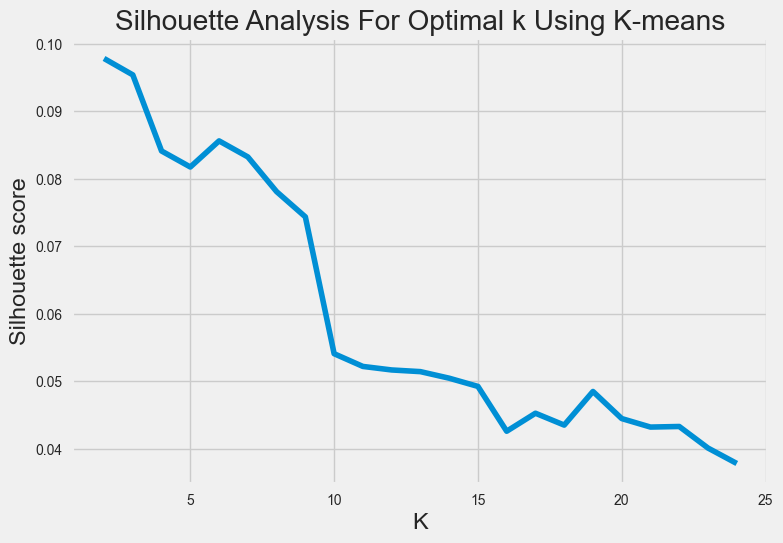

In [111]:
plot_silhouette_score(potential_k_range, silhouette_score_for_ks, "K-means")

## silhouette_score_for_medoids_ks

In [113]:
silhouette_score_for_medoids_ks = calculate_silhouette_score(KMedoids, potential_k_range, data)

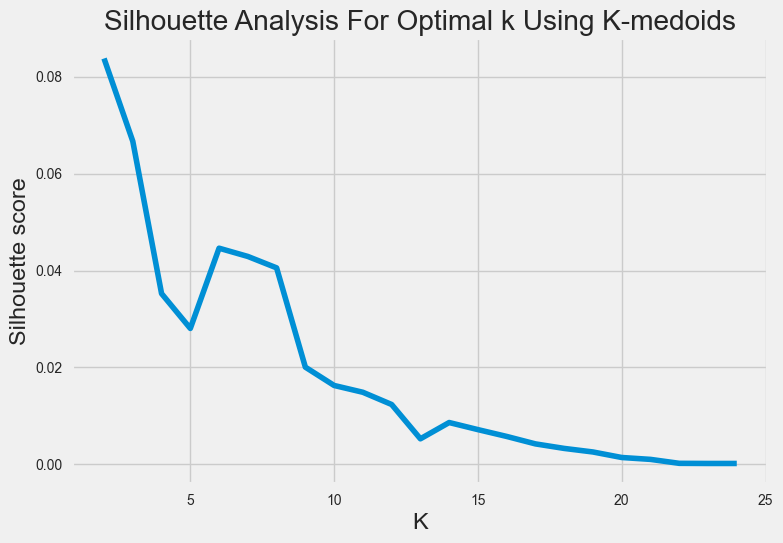

In [114]:
plot_silhouette_score(potential_k_range, silhouette_score_for_medoids_ks, "K-medoids")

In [32]:
pca_centers = pca_model.transform(predicted_centers)
two_components_df["predicted_cluster"] = predicted_labels

c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


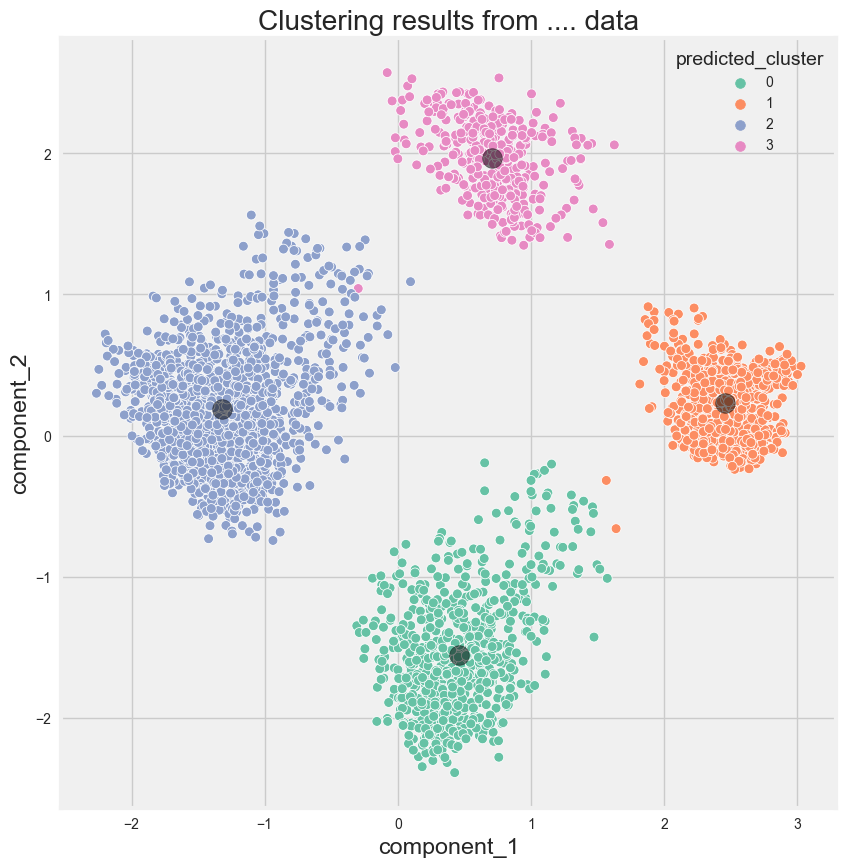

In [33]:
#plot the data and the centroid for each cluster
plt.figure(figsize=(10, 10))
plt.style.use("fivethirtyeight")
scat = sns.scatterplot(
   x="component_1",
   y="component_2",
   # z="component_3",
   s=50,
   data=two_components_df, 
   hue="predicted_cluster",  
   palette="Set2"
)
 
scat.set_title( "Clustering results from .... data") 
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [36]:
#Initiate a pca model to reduce the dimentions of the data
#so we can plot it in the 2d space (as a post-processing step)
pca_three_components_model = PCA(n_components = 3, random_state=0) 
#reduce the dimentions of the data used in the training process 
pca_data = pca_three_components_model.fit_transform(data)
#reduce the dimentions of the centroids 
pca_centers = pca_three_components_model.transform(predicted_centers)
pca_data.shape
# define "components_df" that include the valuse for the components after reducing the dimentions 
three_components_df = pd.DataFrame(
    pca_data,
    columns=["component_1", "component_2", "component_3"],
    ) 

c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


C:\Users\hp\AppData\Local\Temp\ipykernel_20968\2543176435.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(


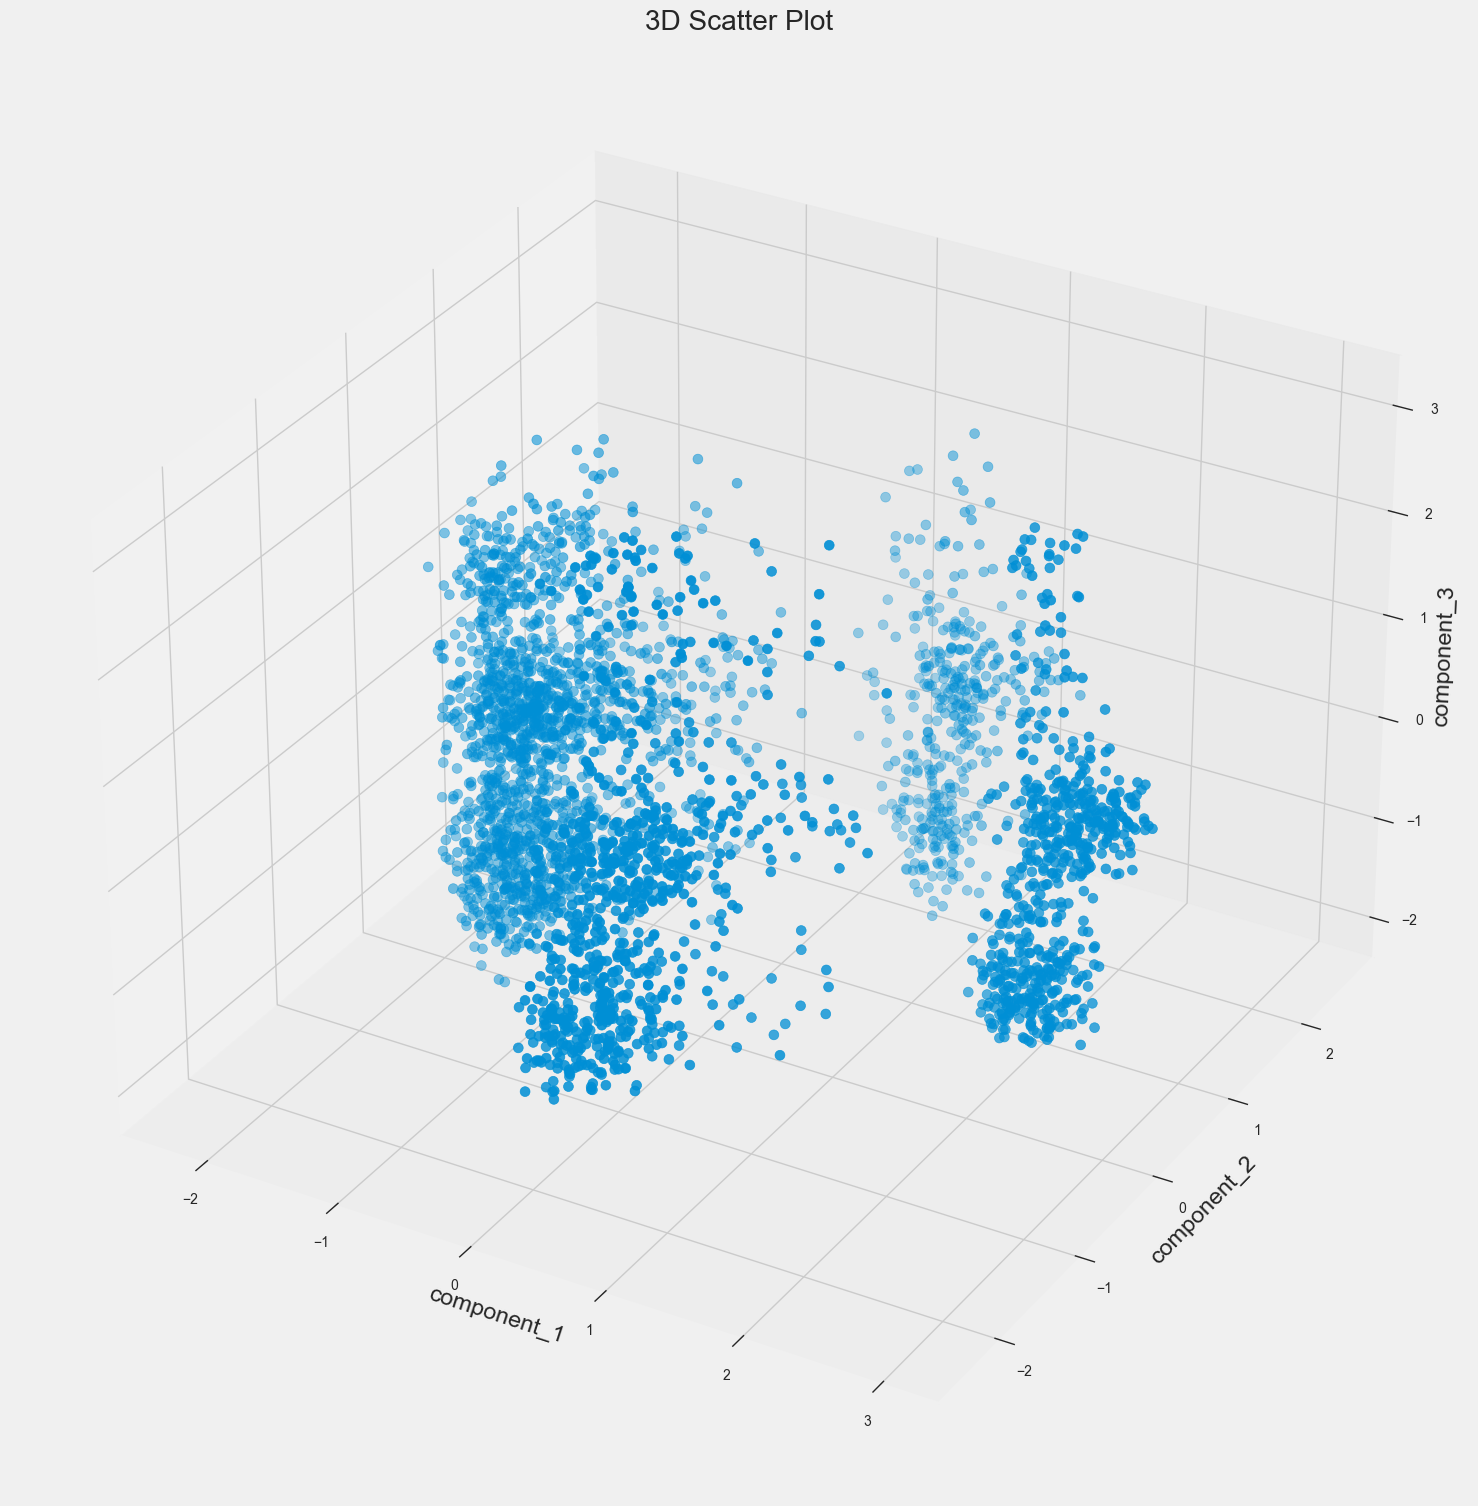

In [40]:
# Create a 3D figure
fig = plt.figure(figsize=(18, 18))
ax = plt.axes(projection='3d')
# Plot the data
ax.scatter3D(
    three_components_df['component_1'], 
    three_components_df['component_2'], 
    three_components_df['component_3'], 
    cmap='Greens',
    s=50
    )

# Add labels and title
ax.set_xlabel('component_1')
ax.set_ylabel('component_2')
ax.set_zlabel('component_3')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()